# Feature Analysis

Evaluate which features are characteristic for hate speech posts, e.g. 

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_dataset = pd.read_csv("extracted_features.csv", index_col=0)
df_dataset.head()

,class,number_of_exclamation_mark,number_of_question_mark,number_of_full_stop_mark,number_of_hateful_words,number_of_neutral_words,number_of_interjections,number_of_all_caps_words,number_of_quotation_marks,number_of_words,number_of_laughing_expressions,hate_speech_unigrams,hate_speech_bigrams,hate_speech_trigrams,pattern_count,sentiment,topic
0,1,3,0,4,1,3,0,1,0,23,0,6,0,0,6,0.4563,0
1,1,0,0,1,0,3,0,1,0,21,0,2,0,0,7,0.5542,0
2,0,0,0,1,1,0,0,0,0,23,0,9,1,0,7,-0.8176,1
3,1,0,1,0,1,1,0,0,0,11,0,1,0,0,3,0.2755,1
4,1,0,0,4,1,5,0,3,0,20,0,4,0,0,4,0.0000,1


In [5]:
hate_speech = df_dataset[df_dataset["class"] == 0]
non_hate_speech = df_dataset[df_dataset["class"] == 1]

class


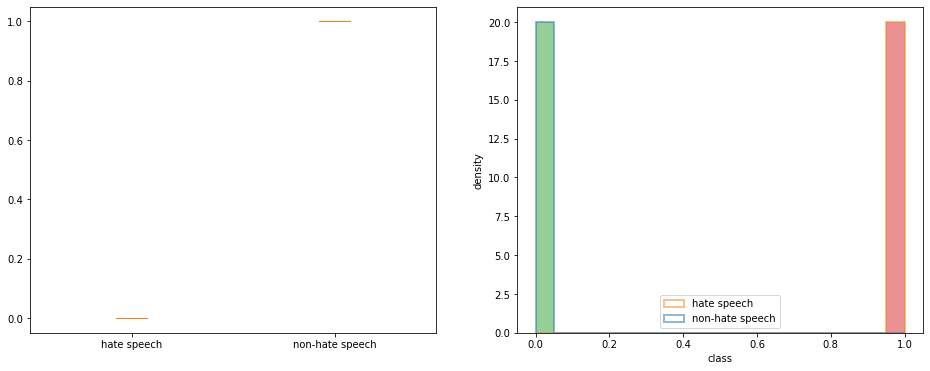




number_of_exclamation_mark


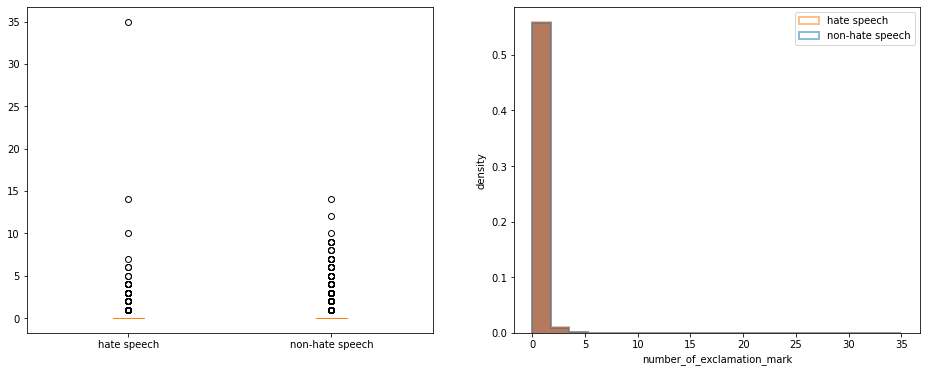




number_of_question_mark


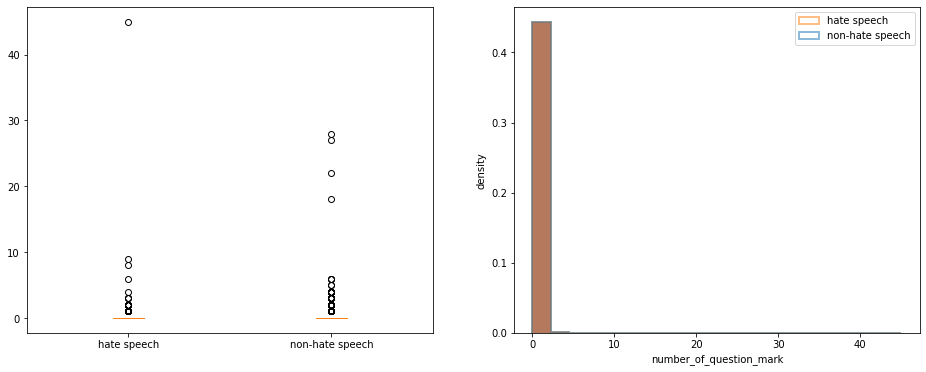




number_of_full_stop_mark


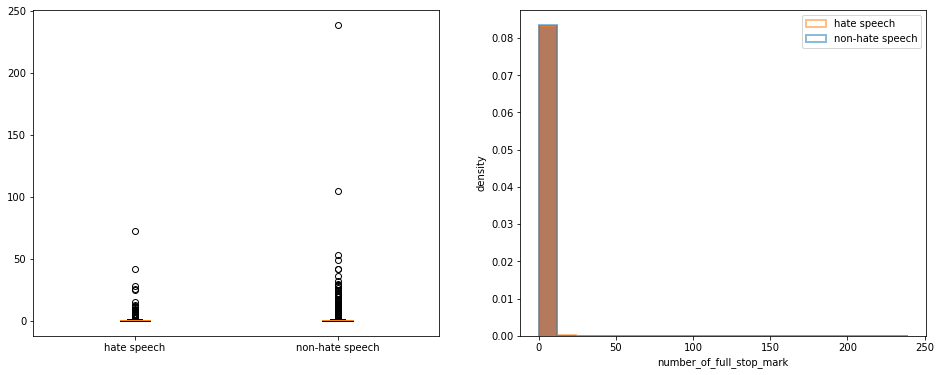




number_of_hateful_words


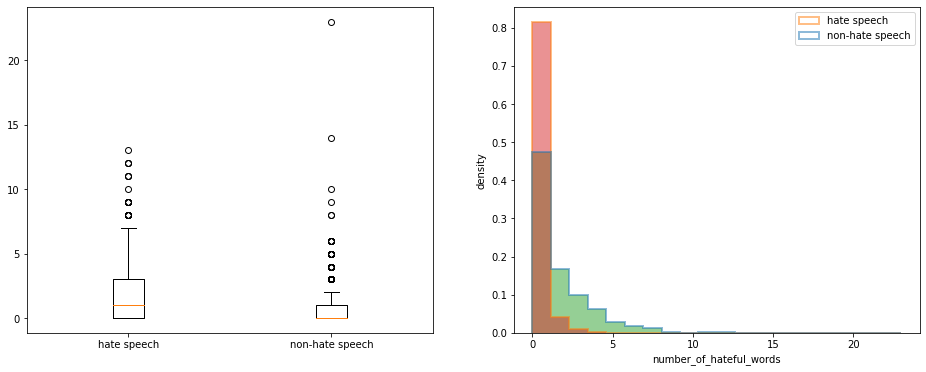




number_of_neutral_words


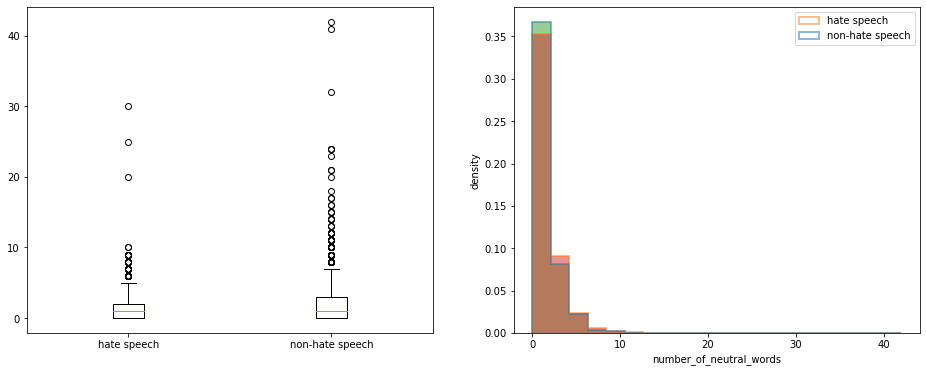




number_of_interjections


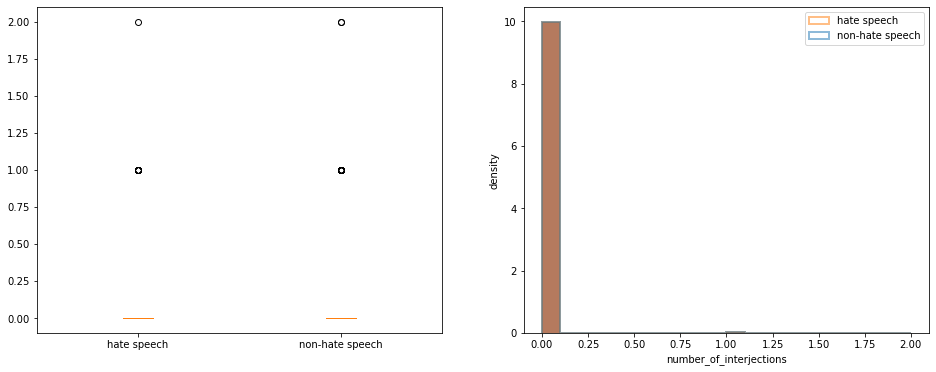




number_of_all_caps_words


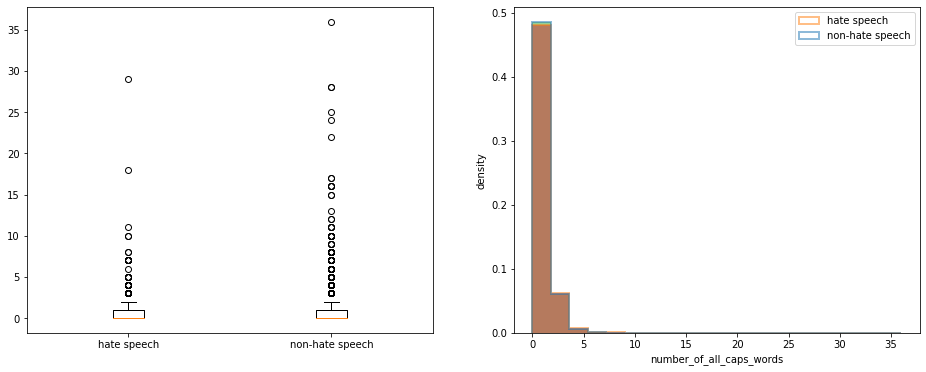




number_of_quotation_marks


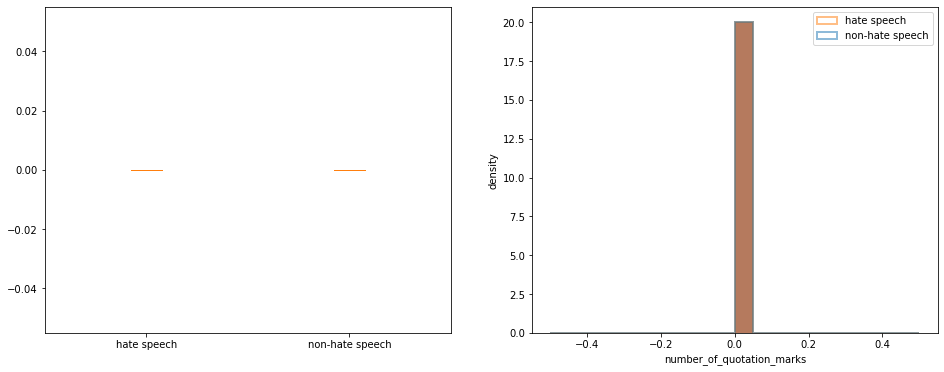




number_of_words


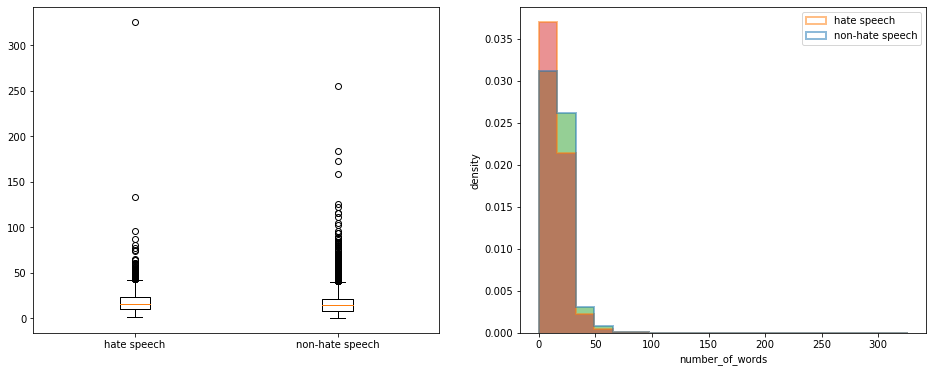




number_of_laughing_expressions


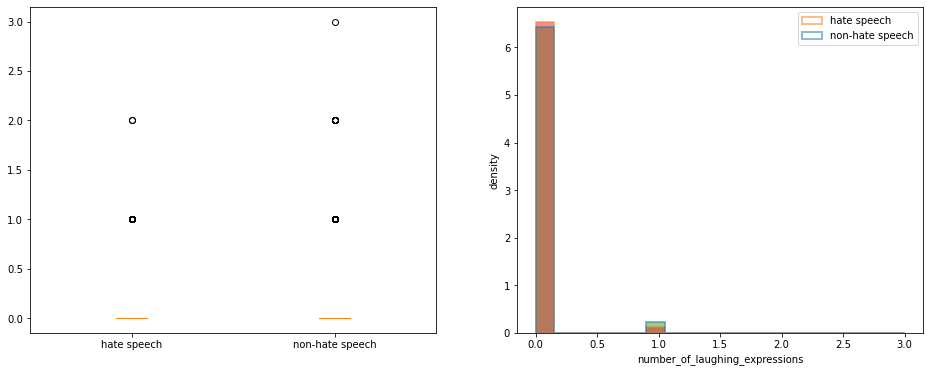




hate_speech_unigrams


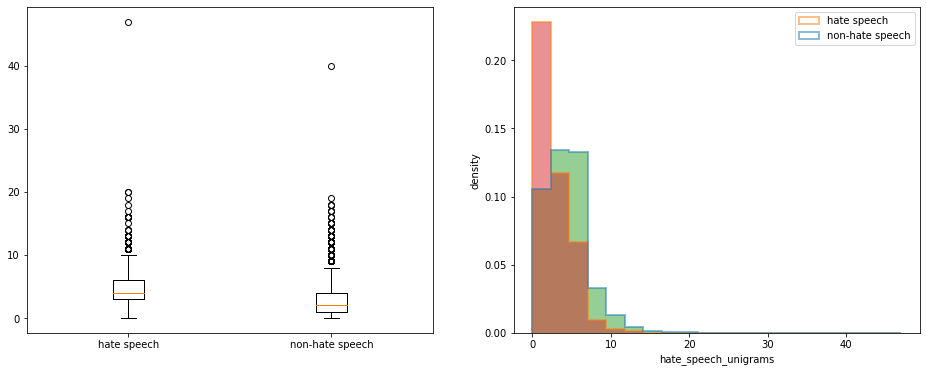




hate_speech_bigrams


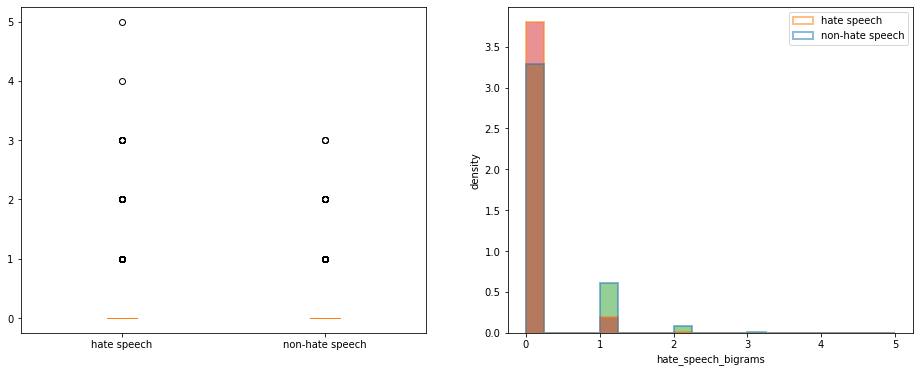




hate_speech_trigrams


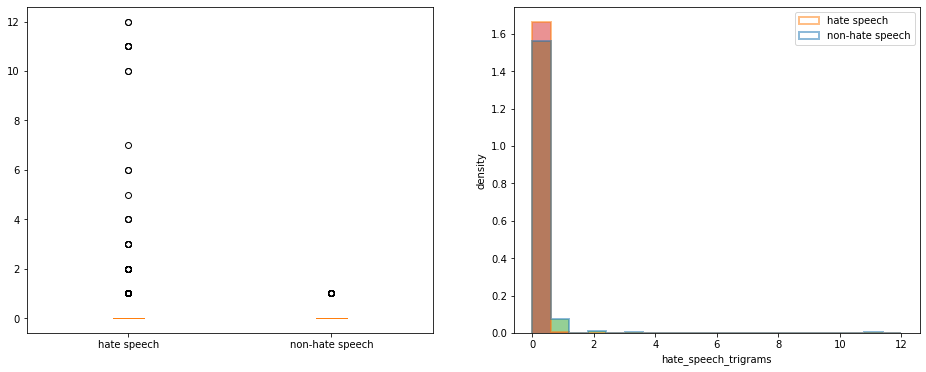




pattern_count


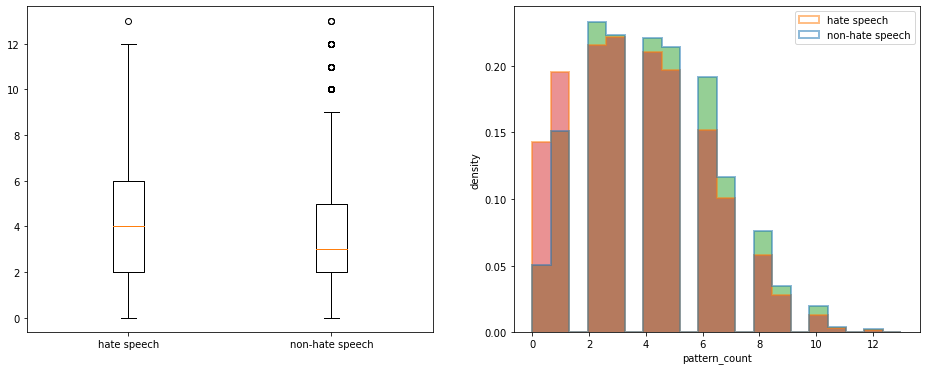




sentiment


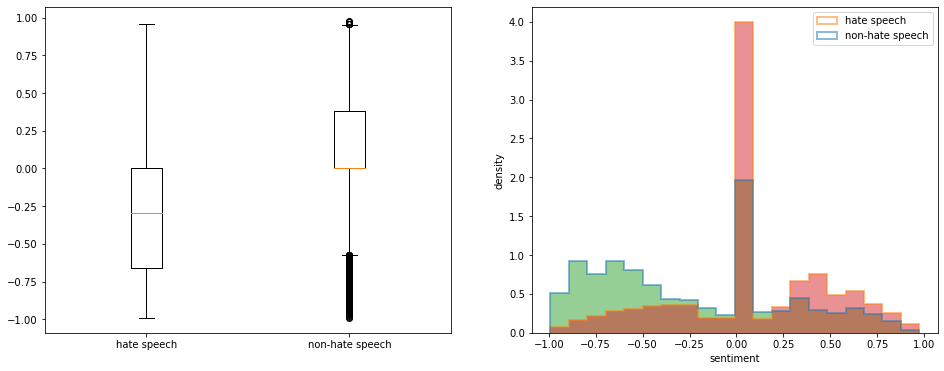




topic


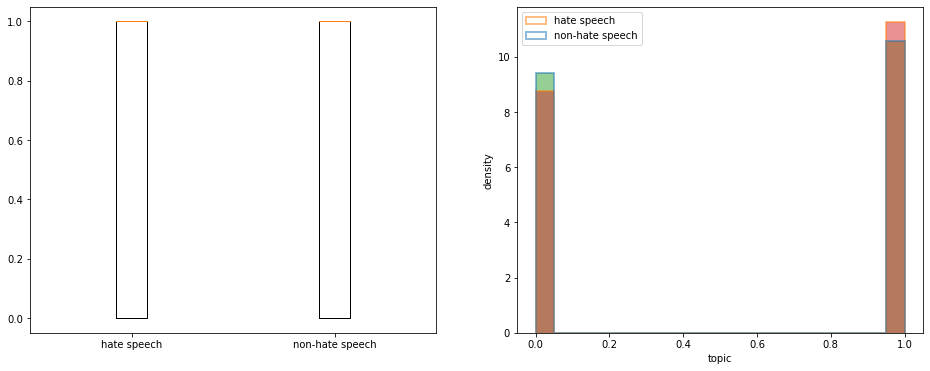

In [17]:
def plot_feature(feature, hate_speech, non_hate_speech):
    print(feature)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    ax[0].boxplot([hate_speech, non_hate_speech], positions=[1, 2])
    ax[0].set_xticklabels(["hate speech", "non-hate speech"])
    
    bins = 20
    bins = np.histogram(np.hstack((hate_speech, non_hate_speech)), bins=bins)[1]
    plt.hist([hate_speech, non_hate_speech], histtype='step', linewidth=2, bins=bins, alpha=0.5, density=True)
    ax[1].hist(hate_speech, bins=bins, alpha=0.5, density=True)
    ax[1].hist(non_hate_speech, bins=bins, alpha=0.5, density=True)
    ax[1].legend(["hate speech", "non-hate speech"])
    plt.ylabel("density")
    plt.xlabel(feature)
    plt.show()
    print("\n\n")
    
    
for key in hate_speech.keys():
    plot_feature(key, hate_speech[key], non_hate_speech[key])
    
# plot_feature("number_of_exclamation_mark", hate_speech["number_of_exclamation_mark"], non_hate_speech["number_of_exclamation_mark"])

### dictionary statistics

In [6]:
hate_words = {'negroes', 'hoes', 'women', 'retarded', 'fuckin', 'fuck', 'niggers', 'yall', 'hell', 'faggots', 'cunt', 'fags', 'hoe', 'shit', 'negro', 'niggah', 'fucking', 'scum', 'bitches', 'pussy', 'jew', 'spic', 'youre', 'racist', 'nigger', 'stupid', 'da', 'africa', 'jews', 'nigga', 'ugly', 'house', 'kill', 'ass', 'dyke', 'children', 'god', 'faggot', 'niggas', 'bitch', 'stop', 'coon', 'tell', 'real', 'fag', 'queer', 'dumb', 'gay'}
neutral_words= {'years', 'https', 'year', 'news', 'post', 'monkey', 'com', 'eyes', 'area', 'times', 'bird', 'big', 'ago', 'yellow', 'colored', 'yes', 'saw', 'www', 'friends', 'll', 'feel', 'talk', 'charlie', 'video', 'start', 'free', 'thread', 'long', 'birds', 'looking', 'work', 'today', 'does', 've', 'game', 'thank', 'great', 'went', 'thanks', 'maybe', 'yankees', 'youtube', 'seen', 'old', 'use', 'best', 'stormfront', 'read'}

In [7]:
from collections import Counter

df_dataset = pd.read_csv("dataset.csv", index_col=0)
hate = df_dataset[df_dataset["class"] == 0]

hate_count = Counter()
neutral_count = Counter()

for i, value in hate["content"].items():
    for word in hate_words:
        if word in value:
            hate_count[word] += 1
    for word in neutral_words:
        if word in value:
            neutral_count[word] += 1
            
for key in hate_count:
    hate_count[key] /= len(hate)
for key in neutral_count:
    neutral_count[key] /= len(hate)

print("in hate speech:")
print()
print("most common hate words: ")
for key, value in hate_count.most_common(10):
    print(f"{str(key): <7} : {value: .2f}")
print()
print("most common neutral words:")
for key, value in neutral_count.most_common(10):
    print(f"{str(key): <7} : {value: .2f}")

in hate speech:

most common hate words: 
fag     :  0.13
da      :  0.12
faggot  :  0.09
bitch   :  0.09
ass     :  0.08
nigga   :  0.07
fuck    :  0.07
nigger  :  0.05
real    :  0.04
fuckin  :  0.03

most common neutral words:
ll      :  0.38
ve      :  0.35
use     :  0.08
com     :  0.07
old     :  0.02
work    :  0.02
talk    :  0.02
read    :  0.02
long    :  0.01
start   :  0.01


In [8]:
non_hate = df_dataset[df_dataset["class"] == 1]

hate_count = Counter()
neutral_count = Counter()

for i, value in non_hate["content"].items():
    for word in hate_words:
        if word in value:
            hate_count[word] += 1
    for word in neutral_words:
        if word in value:
            neutral_count[word] += 1
            
for key in hate_count:
    hate_count[key] /= len(non_hate)
for key in neutral_count:
    neutral_count[key] /= len(non_hate)

print("in non-hate speech:")
print()
print("most common hate words: ")
for key, value in hate_count.most_common(10):
    print(f"{str(key): <8} : {value: .2f}")
print()
print("most common neutral words:")
for key, value in neutral_count.most_common(10):
    print(f"{str(key): <8} : {value: .2f}")

in non-hate speech:

most common hate words: 
da       :  0.10
ass      :  0.03
real     :  0.02
tell     :  0.01
kill     :  0.01
house    :  0.01
stop     :  0.01
children :  0.01
hell     :  0.01
hoe      :  0.01

most common neutral words:
ve       :  0.32
ll       :  0.32
com      :  0.07
use      :  0.05
old      :  0.03
bird     :  0.03
read     :  0.03
year     :  0.03
post     :  0.02
www      :  0.02


### ngram statistics

In [20]:
from collections import Counter

df_dataset = pd.read_csv("extracted_features_details.csv", index_col=0)
hate = df_dataset[df_dataset["class"] == 0]

unigram_counter = hate["unigrams"].apply(lambda cell: Counter(eval(cell))).sum()
for key in unigram_counter:
    unigram_counter[key] /= len(hate)
    
bigram_counter = hate["bigrams"].apply(lambda cell: Counter(eval(cell))).sum()
for key in bigram_counter:
    bigram_counter[key] /= len(hate)
    
trigram_counter = hate["trigrams"].apply(lambda cell: Counter(eval(cell))).sum()
for key in trigram_counter:
    trigram_counter[key] /= len(hate)

print("for hate speech")
print("most common unigrams: ")
for key, value in unigram_counter.most_common(10):
    print(f"{str(key): <8} : {value: .2f}")
print()

print("most common bigrams: ")
for key, value in bigram_counter.most_common(10):
    print(f"{str(key): <8} : {value: .2f}")
print()

print("most common trigrams: ")
for key, value in trigram_counter.most_common(10):
    print(f"{str(key): <8} : {value: .4f}")
print()

for hate speech
most common unigrams: 
('white',) :  0.15
('like',) :  0.10
('rt',)  :  0.10
('faggot',) :  0.09
('bitch',) :  0.09
('not',) :  0.09
('black',) :  0.08
('fuck',) :  0.07
('nigga',) :  0.07
('nigger',) :  0.05

most common bigrams: 
('white', 'trash') :  0.02
('look', 'like') :  0.01
('ass', 'nigga') :  0.01
('be', 'not') :  0.01
('white', 'peopl') :  0.01
('non', 'white') :  0.01
('fuck', 'faggot') :  0.01
('go', 'to') :  0.01
('bitch', 'nigga') :  0.01
('bitch', 'ass') :  0.01

most common trigrams: 
('bitch', 'ass', 'nigga') :  0.0036
('pussi', 'ass', 'nigga') :  0.0016
('look', 'like', 'fag') :  0.0012
('da', 'color', 'folk') :  0.0012
('bitch', 'look', 'like') :  0.0012
('happi', 'birthday', 'faggot') :  0.0012
('softestmuffin', 'tee', 'torahblaz') :  0.0012
('hoe', 'ass', 'nigga') :  0.0012
('give', 'glassyey', 'stare') :  0.0012
('hell', 'clean', 'dozen') :  0.0012



### Trigram wordcloud

Counter({'bitch ass nigga': 0.0036144578313253013, 'pussi ass nigga': 0.001606425702811245, 'look like fag': 0.0012048192771084338, 'da color folk': 0.0012048192771084338, 'bitch look like': 0.0012048192771084338, 'happi birthday faggot': 0.0012048192771084338, 'softestmuffin tee torahblaz': 0.0012048192771084338, 'hoe ass nigga': 0.0012048192771084338, 'give glassyey stare': 0.0012048192771084338, 'hell clean dozen': 0.0012048192771084338})


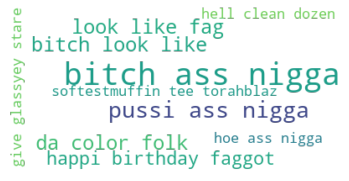

In [54]:
from wordcloud import WordCloud

most_common = trigram_counter.most_common(10)

counter = Counter()
for elem, freq in most_common:
    counter[" ".join(elem)] = freq
print(counter)
wordcloud = WordCloud(background_color=None, mode="RGBA", stopwords={}).generate_from_frequencies(counter)

fig = plt.figure(1)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig("Wordcloud-HateSpeech-Trigrams", transparent=True)
plt.show()

In [10]:
non_hate = df_dataset[df_dataset["class"] == 1]


unigram_counter = non_hate["unigrams"].apply(lambda cell: Counter(eval(cell))).sum()
for key in unigram_counter:
    unigram_counter[key] /= len(non_hate)
    
bigram_counter = non_hate["bigrams"].apply(lambda cell: Counter(eval(cell))).sum()
for key in bigram_counter:
    bigram_counter[key] /= len(non_hate)
    
trigram_counter = non_hate["trigrams"].apply(lambda cell: Counter(eval(cell))).sum()
for key in trigram_counter:
    trigram_counter[key] /= len(non_hate)

print("for non-hate speech")
print("most common unigrams: ")
for key, value in unigram_counter.most_common(10):
    print(f"{str(key): <8} : {value: .2f}")
print()

print("most common bigrams: ")
for key, value in bigram_counter.most_common(10):
    print(f"{str(key): <8} : {value: .2f}")
print()

print("most common trigrams: ")
for key, value in trigram_counter.most_common(10):
    print(f"{str(key): <8} : {value: .4f}")
print()

for non-hate speech
most common unigrams: 
('rt',)  :  0.08
('white',) :  0.07
('like',) :  0.07
('not',) :  0.05
('trash',) :  0.05
('peopl',) :  0.04
('nt',)  :  0.04
('look',) :  0.04
('be',)  :  0.03
('time',) :  0.03

most common bigrams: 
('look', 'like') :  0.01
('white', 'peopl') :  0.00
('go', 'to') :  0.00
('be', 'not') :  0.00
('got', 'to') :  0.00
('sound', 'like') :  0.00
('high', 'school') :  0.00
('will', 'not') :  0.00
('white', 'race') :  0.00
('non', 'white') :  0.00

most common trigrams: 
('https', '//www.stormfront.org', 'forum') :  0.0017
('da', 'color', 'folk') :  0.0001
('feel', 'like', 'be') :  0.0001
('got', 'to', 'love') :  0.0001
('big', 'black', 'femal') :  0.0001
('like', 'white', 'man') :  0.0001
('like', 'da', 'color') :  0.0001
('zionistengin', 'intent', 'destruct') :  0.0001
('destruct', 'western', 'civil') :  0.0001
('dr', 'lorrain', 'day') :  0.0001



### pattern statistics

In [12]:
from collections import Counter

df_dataset = pd.read_csv("extracted_features_details.csv", index_col=0)
hate = df_dataset[df_dataset["class"] == 0]

hate_pattern_counter = hate["patterns"].apply(lambda cell: Counter(eval(cell))).sum()
for key in hate_pattern_counter:
    hate_pattern_counter[key] /= len(hate)

print("most common patterns in hate speech:")
for key, value in hate_pattern_counter.most_common(10):
    print(f"{str(key): <14} : {value: .2f}")

most common patterns in hate speech:
('JJ', 'NN')   :  0.56
('NN', 'NN')   :  0.51
('DT', 'NN')   :  0.48
('NN', 'IN')   :  0.39
('IN', 'DT')   :  0.35
('DT', 'JJ')   :  0.32
('TO', 'VB')   :  0.25
('IN', 'NN')   :  0.24
('PRP', 'VBP') :  0.23
('JJ', 'NNS')  :  0.23


In [13]:
non_hate = df_dataset[df_dataset["class"] == 1]

non_hate_pattern_counter = non_hate["patterns"].apply(lambda cell: Counter(eval(cell))).sum()
for key in non_hate_pattern_counter:
    non_hate_pattern_counter[key] /= len(non_hate)

print("most common patterns in non-hate speech:")
for key, value in non_hate_pattern_counter.most_common(10):
    print(f"{str(key): <14} : {value: .2f}")

most common patterns in non-hate speech:
('JJ', 'NN')   :  0.48
('DT', 'NN')   :  0.43
('NN', 'NN')   :  0.43
('NN', 'IN')   :  0.39
('IN', 'DT')   :  0.33
('DT', 'JJ')   :  0.27
('IN', 'NN')   :  0.27
('TO', 'VB')   :  0.22
('JJ', 'NNS')  :  0.19
('NNS', 'VBP') :  0.19


In [14]:
diff = hate_pattern_counter - non_hate_pattern_counter
print("diff:")
for key, value in diff.most_common(10):
    print(f"{str(key): <14} : {value: .2f}")

diff:
('PRP', 'VBP') :  0.10
('JJ', 'NN')   :  0.08
('NN', 'NN')   :  0.08
('DT', 'JJ')   :  0.05
('DT', 'NN')   :  0.05
('NNS', 'VBP') :  0.04
('JJ', 'NNS')  :  0.04
('TO', 'VB')   :  0.03
('NNS', 'IN')  :  0.02
('IN', 'DT')   :  0.02
